In [1]:
# Initialization of packaging and figure looking in matplotlib
# the tools module contains costum set of functions for GP interpolation

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
from cobaya.run import run
from cobaya.yaml import yaml_load_file
import seaborn as sns
from getdist import  loadMCSamples, MCSamples
from getdist.mcsamples import MCSamplesFromCobaya
import getdist.plots as gdplt
import os, sys

colors = ["#003049","#d62828", "#f77f00", "#fcbf49",'#eae2b7']
cpal= sns.color_palette(colors)

plt.rcParams['mathtext.default']= 'regular'
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['axes.labelsize'] = 15
plt.rcParams["axes.labelpad"]=10   # axes labels distance from tick labels
plt.rcParams["axes.titlesize"] = 15
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
rc('text',usetex=False)           # use LaTex for plot texts plt.rcParams['figure.dpi'] = 100  #  figure dimension in dpi
plt.rcParams['figure.dpi'] = 150



In [2]:
#Assume installed from github using "git clone --recursive https://github.com/cmbant/CAMB.git"
#This file is then in the docs folders
camb_path = os.path.realpath(os.path.join(os.getcwd(),'../CAMB/'))
sys.path.insert(0,camb_path)
import camb
from camb import model, initialpower
print('Using CAMB %s installed at %s'%(camb.__version__,os.path.dirname(camb.__file__)))

#import SNIA data files 

zsn,zhel,mb,dmb = np.loadtxt('lcparams_full_long_zhel.txt',usecols=(1,2,4,5),unpack=True)
cov = np.loadtxt('sys_full_long.txt',unpack=True,skiprows=1)

cov = np.reshape(cov,(1048,1048))


Using CAMB 1.3.5 installed at /home/stamou/.local/lib/python3.10/site-packages/camb


In [3]:
# We recreate the info dictionary but this time we dump it into a yaml file for later use
# with some easy substitutions we modify the dictionary to obtain wCDM and oCDM inputs
# These files have to be called externally through "cobaya-run file_name"

info = {'likelihood': {'SNIaCostumLike.PantheonCostum': {'python_path' : './'}},
 'params': {
            'H0': {'latex': 'H_0',
                   'prior': {'max': 80, 'min': 50},
                   'proposal': 0.01,
                   'ref': {'dist': 'norm', 'loc': 67, 'scale': 2}},
            'YHe': 0.245341,
            'mnu': 0.06,
            'ombh2': {'latex': '\\Omega_\\mathrm{b} h^2',
                      'prior': {'dist': 'norm', 'loc': 0.0222, 'scale': 0.0005},
                      'proposal': 0.0004,
                      'ref': {'dist': 'norm', 'loc': 0.0222, 'scale': 0.0005}},
            'omch2': {'latex': '\\Omega_\\mathrm{c} h^2',
                      'prior': {'max': 0.99, 'min': 0.001},
                      'proposal': 0.002,
                      'ref': {'dist': 'norm', 'loc': 0.12, 'scale': 0.003}},
            'omega_de': {'latex': '\\Omega_\\Lambda'},
            'omegam': {'latex': '\\Omega_\\mathrm{m}'},
            'omegamh2': {'derived': 'lambda omegam, H0: omegam*(H0/100)**2',
                         'latex': '\\Omega_\\mathrm{m} h^2'}},
 'sampler': {'mcmc': ''},
 'theory': {'camb': {'extra_args': {'nnu': 3.046, 'num_massive_neutrinos': 1,}}},
 'stop_at_error': True      
       }

update_runs = ['' ,{'w': {'latex': 'w_\\mathrm{DE}',
                  'prior': {'max': -0.333, 'min': -3},
                  'proposal': 0.02,
                  'ref': {'dist': 'norm', 'loc': -0.99, 'scale': 0.02}}},
               {'omk': {'latex': '\\Omega_k',
                    'prior': {'max': 0.3, 'min': -0.3},
                    'proposal': 0.001,
                    'ref': {'dist': 'norm', 'loc': -0.009, 'scale': 0.001}}}
              ]

In [4]:
import yaml

for i,name in zip(update_runs,['LCDM','wCDM','oCDM']):
    _info = info.copy()
    _info['params'].update(i)
    
    _info['output']= 'chainsprime/Pantheon_'+name

    with open('Pantheon_SNIa_'+name+'.yaml','w') as outfile:
         yaml.dump(_info,outfile,default_flow_style=False)



<Figure size 1200x900 with 0 Axes>

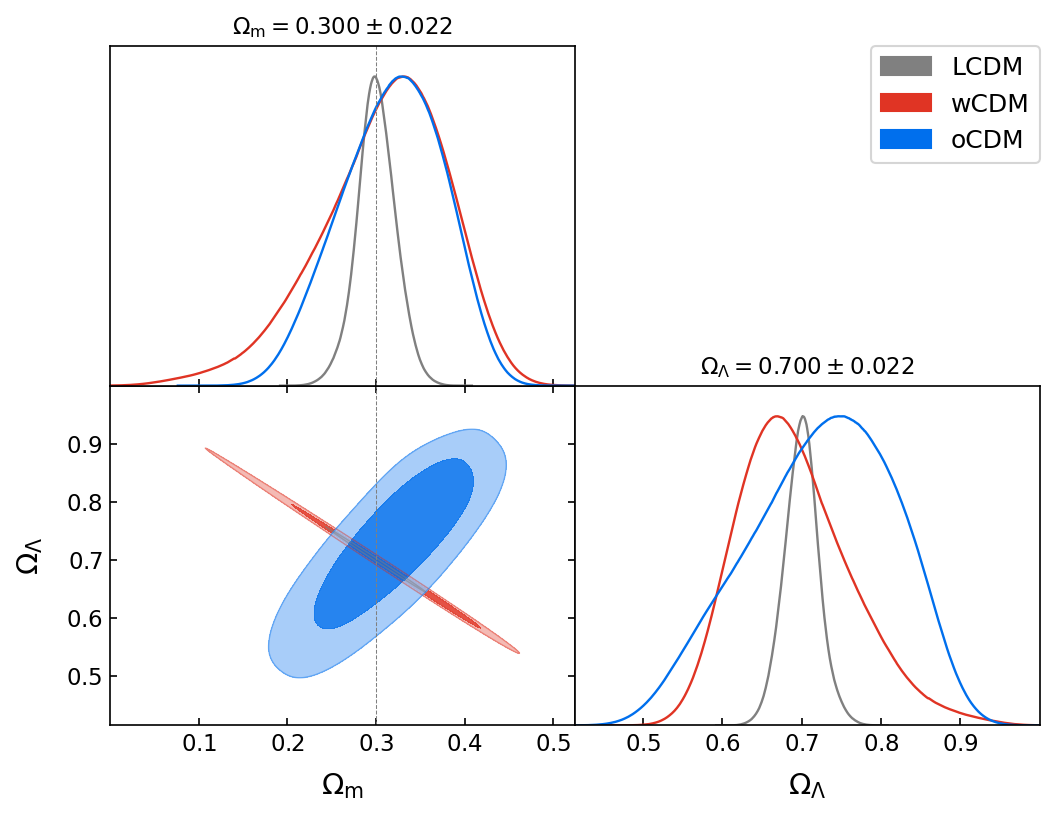

In [5]:
from getdist import loadMCSamples
from getdist import plots
import getdist.plots as gdplt

fname = [
         'Pantheon_LCDM',
         'Pantheon_wCDM',
         'Pantheon_oCDM',
        ]

labels = [fn.split('_')[-1] for fn in fname]


params = ['omegam','omega_de']
colors = sns.hls_palette(4,h=.4,l=.4,s=1).as_hex()


samples = [loadMCSamples('./chainsprime/'+x,settings={'ignore_rows': 0.3}) for x in fname]


g = gdplt.get_single_plotter(width_inch=8)
g.triangle_plot(samples,params, legend_labels=labels, 
                markers={'omegam':0.3,'w':-1,'omk':0},filled=True,title_limit=1);

<Figure size 1200x900 with 0 Axes>

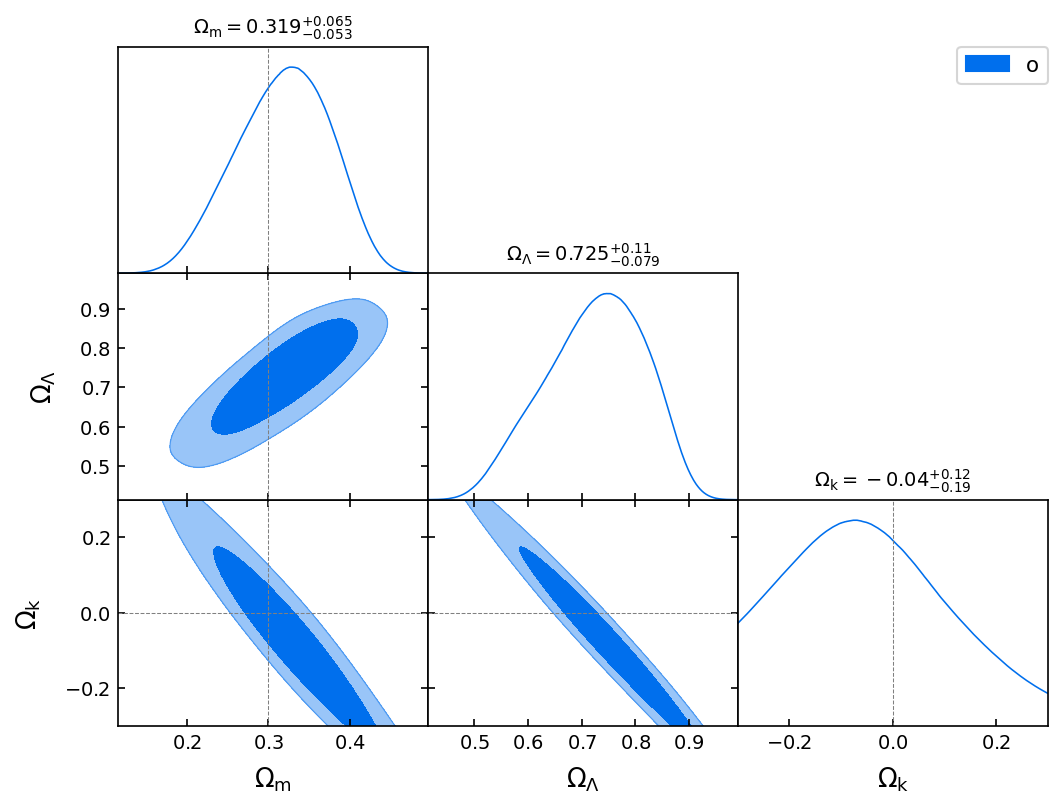

In [6]:
gg = gdplt.get_single_plotter(width_inch=8)
gg.triangle_plot(samples[2],params+['omk'], legend_labels=labels[2], 
                markers={'omegam':0.3,'w':-1,'omk':0},filled=True,title_limit=1);